<a href="https://colab.research.google.com/github/marybello/cardio_disease_classification/blob/master/heartClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('heart.csv')
dataset.shape

(303, 14)

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset['target'].value_counts()
#we seem to have a fairly equal dataset

1    165
0    138
Name: target, dtype: int64

In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

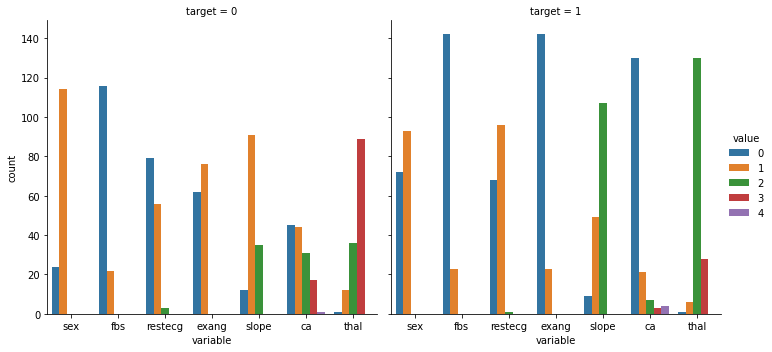

In [ ]:
#visualizing the categorical variables
X1= dataset.melt(id_vars=['target'], value_vars=[ 'sex', 'fbs', 'restecg',
       'exang', 'slope', 'ca', 'thal'])
g= sns.catplot(data=X1,x="variable",hue="value", kind="count",col='target')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1b9cfaa58>,
      dtype=object)

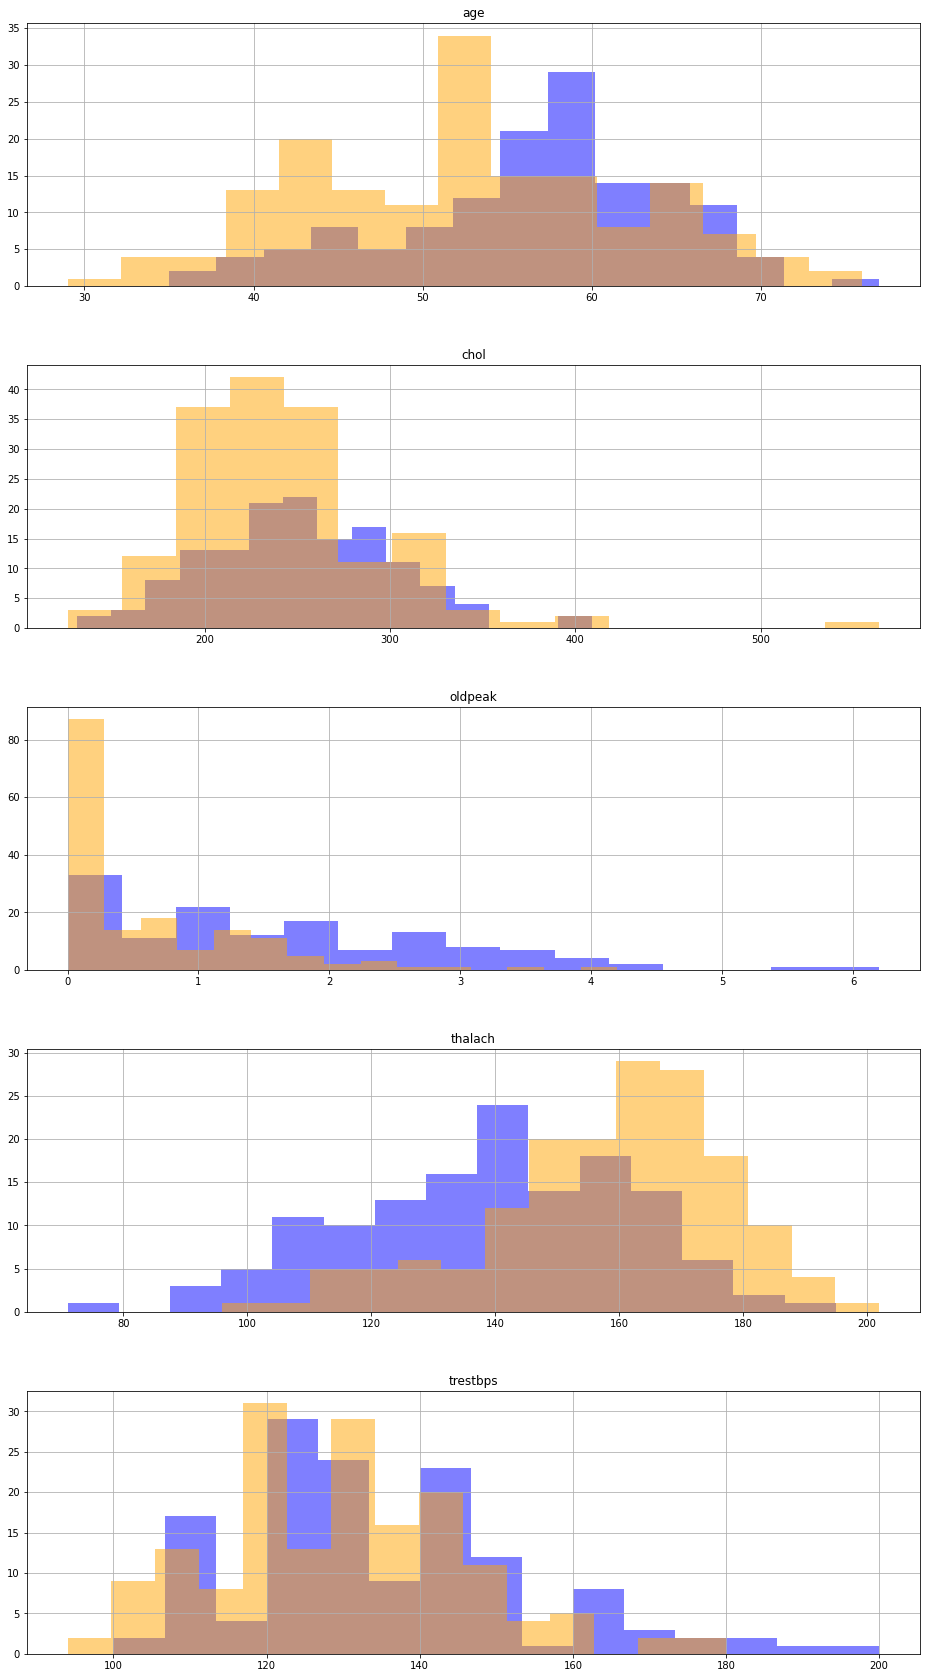

In [ ]:
#visualizing the diffrences in the numerical variable
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, ax = plt.subplots(5,1, figsize=(16,30))
dataset0[features].hist(bins=15, alpha=0.5, color='blue', ax=ax)
dataset1[features].hist(bins=15, alpha=0.5, color='orange', ax=ax)

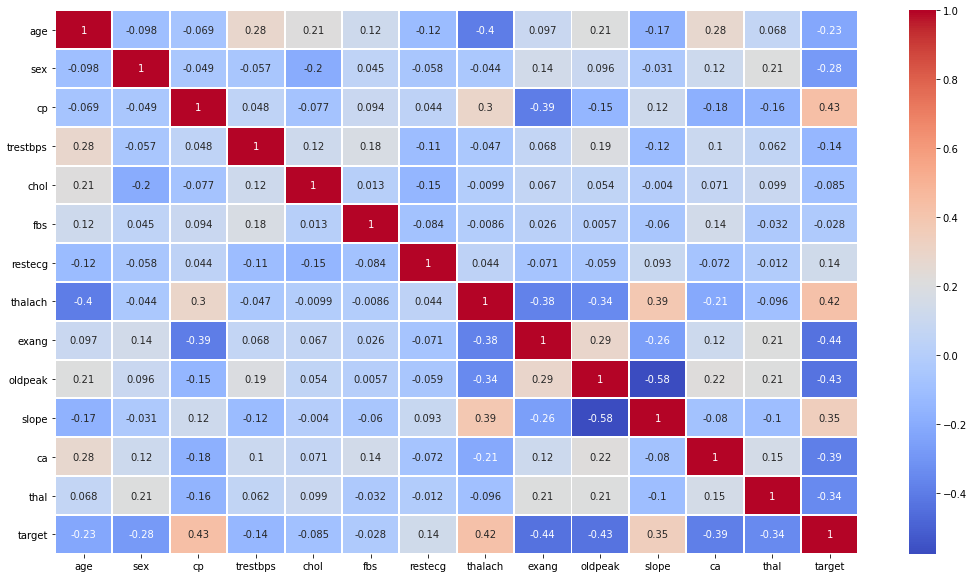

In [ ]:
#Creating a heatmap to see the correlation between the features
corr = dataset.corr()
plt.figure(figsize=(18,10)) 
sns.heatmap(corr, annot=True, linewidths=1, cmap='coolwarm')

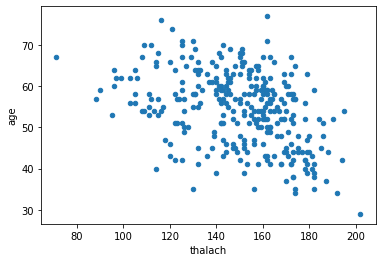

In [ ]:
#from the heatmap, thalach and age are two numeric features that are correlatted
dataset.plot.scatter(x='thalach', y='age') # to view the relationship between the two values
# it's observed that thalach decreases with increasing age

In [ ]:
#splling the dataset by the target group
dataset1 = dataset[dataset['target']==1]
dataset0 = dataset[dataset['target']==0]
dataset0.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [ ]:
dataset1.describe()
#from the statistic description,checking the mean of the variables it's observed that the features sex,cp,thalach,exang,old peak,ca have means that are significantly different
# we can imply that these features may play an important role in determining the state of the heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [ ]:
#spliting the dataset into target and independent variables and spliting them into test and train
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [ ]:
#instantiating our classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
classifier = RandomForestClassifier(n_estimators=7,criterion='entropy', random_state=0, n_jobs=-1)


In [ ]:
#fit the our train set to the classifier
classifier.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#predict the test set
y_pred =  classifier.predict(X_test)
#check the accuracy score
score = metrics.accuracy_score(Y_test, y_pred)
print(score)

0.9210526315789473


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[36,  2],
       [ 4, 34]])

In [ ]:
#establish the most important features
feature = X.columns
df_feature_importance = pd.DataFrame(classifier.feature_importances_,index=feature, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
thalach,0.148763
ca,0.119682
oldpeak,0.116605
thal,0.094359
chol,0.092512
exang,0.084291
trestbps,0.082272
age,0.075661
cp,0.071975
sex,0.049459


Text(0.5, 1.0, 'feature importance')

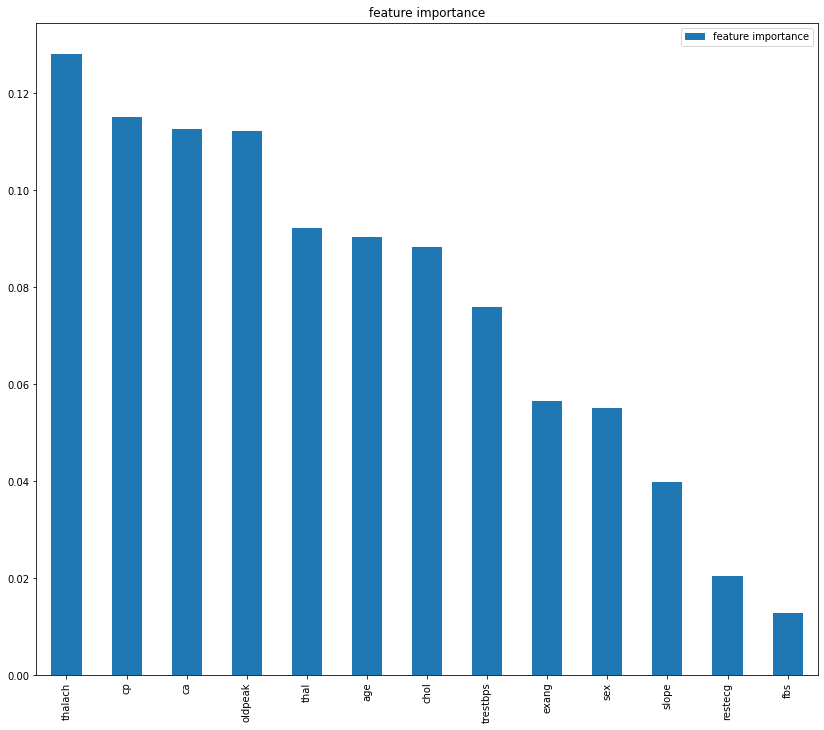

In [ ]:
#let's visualize this feature importance
fig, ax2 = plt.subplots(1,1, figsize=(14,12))
df_feature_importance.plot(kind='bar', ax=ax2).get_figure()
plt.title('feature importance')

In [ ]:
#creating another model trained with our most important features
important_df = dataset.loc[:,['thalach', 'cp','ca','oldpeak','thal','age','chol', 'trestbps','target']]
X_imp = important_df.iloc[:,0:8]
y_imp= important_df.iloc[:,8]
from sklearn.model_selection import train_test_split
X_imp_train, X_imp_test, Y_imp_train, Y_imp_test = train_test_split(X_imp,y_imp,test_size=0.25,random_state=5)

In [ ]:
classifier2 = RandomForestClassifier(n_estimators=17,criterion='entropy', random_state=0, n_jobs=-1)

In [ ]:
classifier2.fit(X_imp_train, Y_imp_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#predict the test set
y_pred2 =  classifier2.predict(X_imp_test)
#check the accuracy score
score2 = metrics.accuracy_score(Y_test, y_pred2)
print(score2)
#an accuracy of 90% is pretty impressive with only our selected most important features

0.9078947368421053


In [ ]:
#using knn algorithm
from sklearn.neighbors import KNeighborsClassifier
df_knn = dataset.copy()
#unlike randomforest classifier, knn classifier requires feature scaling because the algorithm makes use of the euclidean distances between the datapoints
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Sc_X = StandardScaler()  #this gave an accuracy of 84%
Scaler = MinMaxScaler()
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] # the numerical features
for feature in features:
    df_knn[feature] = Scaler.fit_transform(df_knn[feature])
X_fit = df_knn.iloc[:,0:13]  
y = df_knn.iloc[:,13]  
from sklearn.model_selection import train_test_split
X_fit_train, X_fit_test, Y_train, Y_test = train_test_split(X_fit,y,test_size=0.25,random_state=2)
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_fit_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
from sklearn import metrics
pred4 = model.predict(X_fit_test)
score4 = metrics.accuracy_score(Y_test, pred4)
score4


0.8947368421052632

iNSIGHTS

The dataset contains 14 columns and 303 rows of data with 138 rows of data belonging to our target variable 0 and 165 rows to our target variable 1. The dataset seems  pretty balanced so there’s no need to augment it for our analysis. Checking our dataset further, it contains no null variables which is pretty good for us. We have 5 numerical features and 9 categorical variables.   
After grouping our dataset by the target variable, it was observed that some variables differ  significantly in the two groups which can give us an insight as to the factors influencing heart diseases. i.e the ‘exang’ variable has more of the category 1 for our target 0 whereas the same variable has more of category 0 for the target variable 1. Also for the ‘ca’ variable, category 0 is considerably higher in the target variable 1 than in 0. We also have the ‘thal’ variable in which, category 2 is considerably high in the group belonging to the target variable 1 while category 3 being the highest group for the group of target variable 0. We can draw an insight that these 3 features strongly affects the state of the heart and thereby would play a crucial role in determining  the target variable. Further exploratory analysis is also carried out to draw more insight from the dataset.
